In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
shape = 2

# Define Parameters
L = 100  # length of the domain (km)
dx = 1   # space step (km)
c = 0.001  # wave phase speed (km/s)
T = 86400  # time interval (s)
dt = 100  # time step (s)

N = int(T / dt) # + 1
M = int(L / dx + 1)
x = np.linspace(0, L, M)

# Initialize
F = np.zeros((M, N + 1))

# if shape == 1:
#     F[0:46, 0] = 0
#     F[46:52, 0] = 1
#     F[52:, 0] = 0
# elif shape == 2:
#     F[0:41, 0] = 0
#     F[41:58, 0] = np.sin(2 * np.pi * (np.arange(42, 59) - 50) / 16)
#     F[58:, 0] = 0

F[:, 0] = np.sin(2 * np.pi * x / L) 

# # First time step using Lax method (to initialize CSCT)
# for m in range(1, M - 1):
#     F[m, 1] = 0.5 * (F[m + 1, 0] + F[m - 1, 0]) - 0.5 * (c * dt / dx) * (F[m + 1, 0] - F[m - 1, 0])
# # Periodic boundary conditions for first step
# F[0, 1] = 0.5 * (F[1, 0] + F[M - 2, 0]) - 0.5 * (c * dt / dx) * (F[1, 0] - F[M - 2, 0])
# F[M - 1, 1] = F[0, 1]
# 
# # Time stepping using CSCT scheme
# for n in range(1, N):
#     for m in range(1, M - 1):
#         F[m, n + 1] = F[m, n - 1] - (c * dt / dx) * (F[m + 1, n] - F[m - 1, n])
#     # Periodic BCs
#     F[0, n + 1] = F[M - 2, n + 1]
#     F[M - 1, n + 1] = F[1, n + 1]

# Time-stepping
for n in range(N):
    if n == 0:
        for m in range(1, M - 1):
            F[m, n + 1] = F[m, n] - ((c * dt) / (2 * dx)) * (F[m + 1, n] - F[m - 1, n])
            #F[m, n+1] = (1/2) * (F[m + 1, n] + F[m - 1, n]) - ((c * dt) / (2 * dx)) * (F[m + 1, n] - F[m - 1, n])
        # Periodic boundary conditions
        F[0, n+1] = F[M-2, n+1]
        F[M-1, n+1] = F[1, n+1]
        #F[0, 1] = 0.5 * (F[1, 0] + F[M - 2, 0]) - 0.5 * (c * dt / dx) * (F[1, 0] - F[M - 2, 0])
        #F[M - 1, 1] = F[0, 1]

    else:
        for m in range(1, M - 1):
            F[m, n + 1] = F[m, n - 1] - ((c * dt) / dx) * (F[m + 1, n] - F[m - 1, n])
        # Periodic boundary conditions
        F[0, n+1] = F[M-2, n+1]
        F[M-1, n+1] = F[1, n+1]

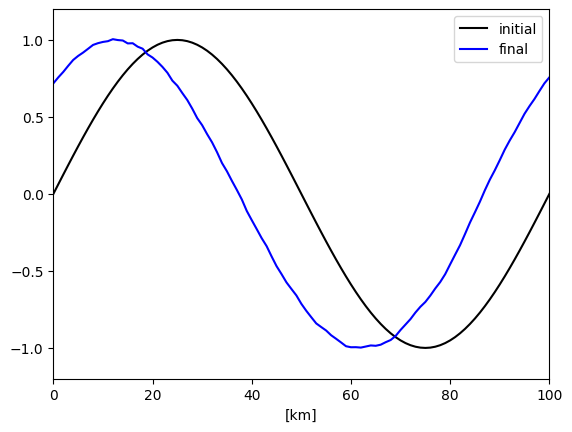

In [56]:
# Plot
fig, ax = plt.subplots()
ax.plot(F[:, 0], c='k', label='initial')
ax.plot(F[:, N], c='blue', label='final')
ax.set_xlim([0, 100])
ax.set_ylim([-1.2, 1.2])
ax.set_xlabel('[km]')
ax.legend()


In [15]:
c*dt/dx

0.1

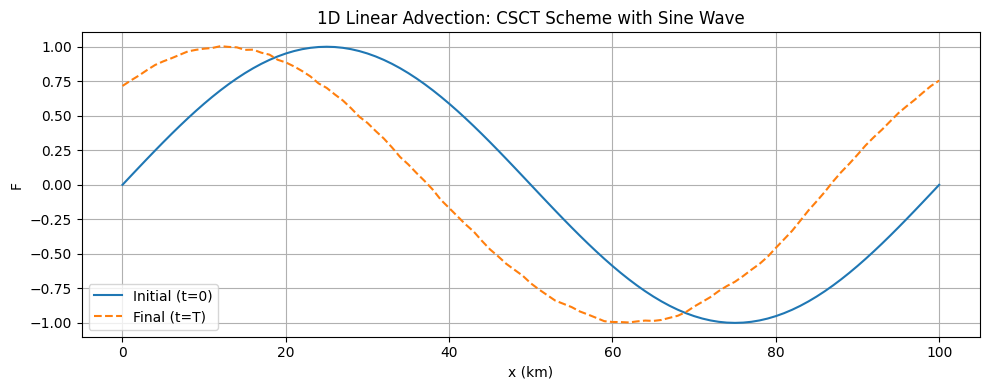

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100       # domain length (km)
dx = 1        # space step (km)
c = 0.001     # wave speed (km/s)
T = 86400     # total time (s)
dt = 100      # time step (s)

# Derived quantities
N = int(T / dt)           # number of time steps
M = int(L / dx) + 1       # number of spatial points
x = np.linspace(0, L, M)  # spatial grid

# Initialize F with a sine wave
F = np.zeros((M, N + 1))
F[:, 0] = np.sin(2 * np.pi * x / L)  # smooth sine wave initial condition

# First time step using Lax method (to initialize CSCT)
for m in range(1, M - 1):
    F[m, 1] = 0.5 * (F[m + 1, 0] + F[m - 1, 0]) - 0.5 * (c * dt / dx) * (F[m + 1, 0] - F[m - 1, 0])
# Periodic boundary conditions for first step
F[0, 1] = 0.5 * (F[1, 0] + F[M - 2, 0]) - 0.5 * (c * dt / dx) * (F[1, 0] - F[M - 2, 0])
F[M - 1, 1] = F[0, 1]

# Time stepping using CSCT scheme
for n in range(1, N):
    for m in range(1, M - 1):
        F[m, n + 1] = F[m, n - 1] - (c * dt / dx) * (F[m + 1, n] - F[m - 1, n])
    # Periodic BCs
    F[0, n + 1] = F[M - 2, n + 1]
    F[M - 1, n + 1] = F[1, n + 1]

# Plot the initial and final wave profiles
plt.figure(figsize=(10, 4))
plt.plot(x, F[:, 0], label='Initial (t=0)')
plt.plot(x, F[:, N], label='Final (t=T)', linestyle='--')
plt.title('1D Linear Advection: CSCT Scheme with Sine Wave')
plt.xlabel('x (km)')
plt.ylabel('F')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()